In [58]:
#imports
import random 
import numpy as np
import math
import matplotlib.pyplot as plt
import time  
from IPython.display import display, clear_output
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', \
                            frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists
#from inclass assignment

In [59]:
class bacteria():
    
    __slots__ = ['x', 'y', 'antibiotic_resistance_gene', 'nutrient_gene', 'temperature_gene', 'toxin_gene', 'mutation_rate', 'reproduction_rate']
    
    def __init__(self, x = random.randint(0,215),y = random.randint(0,215), anti = 0, nutri = 0, temp = 0, toxin = 0, mutation_rate=0.1, reproduction_rate=0.1):
        """
        Creates new bacteria object with random position and genes
        :x: x position of bacteria
        :y: y position of bacteria
        :gene_seed: float value to add to all randomly initialized gene values
        :mutation_rate: the mutation rate for bacteria
        """
        self.x = x
        self.y = y
        
        #initialize all genes to random values between [0, 0.2] + gene_seed
        self.antibiotic_resistance_gene = np.random.rand()/2 + anti #mess with values to see what works - 5 may be too low of gene
        self.nutrient_gene = np.random.rand()/5 + nutri
        self.temperature_gene = np.random.rand()/5 + temp
        self.toxin_gene = np.random.rand()/5 + toxin
        
        self.mutation_rate = mutation_rate
        self.reproduction_rate = reproduction_rate
        
    
    def set_position(self, x, y):
        """
        Sets the position of self using passed arguments
        """
        self.x = x
        self.y = y
        return
    
    def get_pos(self):
        return self.x, self.y
    
    def movement(self, board):
        """
        Randomly move bacteria up to two units in the x and y directions based on nutrients and antibiotics
        """
        if board.get_antibiotics(self.x, self.y) > 0.5:
            new_y = self.y + np.random.randint(-2, 3)
        else:
            new_y = self.y + np.random.randint(-1, 2)
            
        if board.get_nutrients(self.x,self.y) < 0.5: #head towards high nutrients (on x axis)
            new_x = self.x + np.random.randint(-1, 3)
        else:
            new_x = self.x + random.randint(-1,2)
            
        if new_x < 0:
            new_x = 0
        if new_x >= board.ncols:
            new_x = board.ncols - 1

        if new_y < 0:
            new_y = 0
        if new_y >= board.nrows:
            new_y = board.nrows - 1
            
        if not board.get_bacteria(new_x, new_y):
            board.remove_bacteria(self.x,self.y)
            self.x = new_x
            self.y = new_y
            board.add_bacteria(self.x, self.y, self)
            
        return

    
    def reproduce(self, board):
        """
        Returns a new bacteria with genes based off of parent (self)
        
        if np.random.rand() < self.reproduction_rate:
            for new_x in range(self.x - 1, self.x + 2):
                for new_y in range(self.y - 1, self.y + 2):
                    if new_x >= 0 and new_x < 216 and new_y >= 0 and new_y < 216 and not board.get_bacteria(new_x, new_y):
                        newbac = bacteria(new_x, new_y, self.antibiotic_resistance_gene, self.nutrient_gene, self.temperature_gene, self.toxin_gene)
                        board.add_bacteria(new_x, new_y, newbac)
                        return newbac
        """
        #first option could be implemented for multiple offspring at once, would just have to change update function
        if np.random.rand() < self.reproduction_rate:
            openings = board.get_openings(self.y, self.x)
            if openings is not None:
                loc = random.randint(0,len(openings)-1)
                newbac = bacteria(openings[loc][1], openings[loc][0], self.antibiotic_resistance_gene, self.nutrient_gene, self.temperature_gene, self.toxin_gene, self.mutation_rate, self.reproduction_rate)
                board.add_bacteria(openings[loc][1], openings[loc][0], newbac)
        return
    
    
    def mutate(self):
        """
        Randomly calculate if bacteria will mutate
        If true, randomly add from a N(0, 0.1) distribution
        genes mutate independently
        """
        if np.random.rand() < self.mutation_rate:
            self.antibiotic_resistance_gene += 0.1 * np.random.randn()
        if np.random.rand() < self.mutation_rate:
            self.nutrient_gene += 0.1 * np.random.randn()
        if np.random.rand() < self.mutation_rate:
            self.temperature_gene += 0.5 * np.random.randint(1,10) # was trying to increase this
        if np.random.rand() < self.mutation_rate:
            self.toxin_gene += 0.1 * np.random.randn()
    
    def death(self, the_board):
        """
        Calculate something related to the current conditions the bacteria is experiencing to see if it dies based on its genes.
        :external_condition_value: could be anything such as temperature, antibiotics level, white blood cell count, etc
        """
        if self.antibiotic_resistance_gene < the_board.get_antibiotics(self.x,self.y):
            return True
        if self.nutrient_gene < the_board.get_nutrients(self.x,self.y):
            return True
        if self.toxin_gene < the_board.get_toxin(self.x,self.y):
            return True
        if self.temperature_gene < the_board.get_temperature(self.x,self.y):
            return True
        return False
    
    def update(self, board):
        '''
        updates a bacteria
        calls all other methods (movement, reproduce, mutate, death, etc)
        returns boolean for if bacteria has died
        '''
        if self.death(board):
            board.remove_bacteria(self.x, self.y)
            return
        self.movement(board)
        self.mutate()
        self.reproduce(board)
        board.toxins(self)
        return
    
    def draw(self):
        image_path = 'bacteria.jpg'
        imscatter(self.x, self.y, image_path, zoom=0.8)
        return

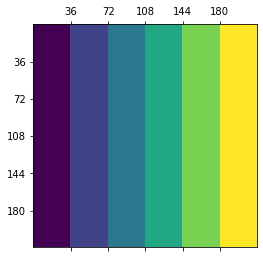

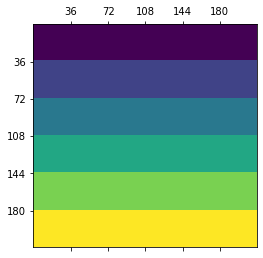

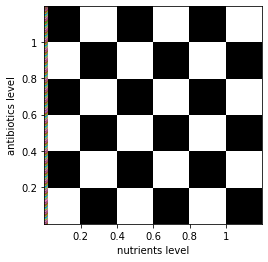

In [60]:
#https://stackoverflow.com/questions/10194482/custom-matplotlib-plot-chess-board-like-table-with-colored-cells
class board():
    
    __slots__ = ['nrows', 'ncols', '_nutrients', '_antibiotics', '_toxins', '_temperature', '_bacteria']
    
    
    def __init__(self, nrows = 9, ncols = 9):
        '''
        Initializes board with given rows and columns
        creates nutrients, anti, toxins, and bacteria private attributes
        currently initializes bacteria in column 0, could easily change later
        '''
        self.nrows = nrows
        self.ncols = ncols
        self._nutrients = np.zeros((self.nrows,self.ncols))
        self._antibiotics = np.zeros((self.nrows,self.ncols))
        self._toxins = np.zeros((self.nrows,self.ncols))
        self._temperature = np.zeros((self.nrows,self.ncols))
        self._bacteria = np.full([self.nrows,self.ncols], None)
        
        #currently initializes bacteria in column 0
        for y_val in range(nrows):
            self._bacteria[y_val,0] = bacteria(0,y_val)
        #print("nutrient initialization: (antibiotics and toxins have same init)")
        #print(self._nutrients)
        #print('\n')
        #print("bacteria locations:")
        #print(self._bacteria)
        self.nutrients()
        self.antibiotics()
    
    def nutrients(self):
        '''
        displays nutrients attribute with random nonzero entry added
        '''
        for col in range(self.ncols):
            if col < self.ncols/6:
                self._nutrients[:,col] = 0
            elif col < 2*self.ncols/6:
                self._nutrients[:,col] = .2
            elif col < 3*self.ncols/6:
                self._nutrients[:,col] = .4
            elif col < 4*self.ncols/6:
                self._nutrients[:,col] = .6
            elif col < 5*self.ncols/6:
                self._nutrients[:,col] = .8
            else:
                self._nutrients[:,col] = 1
        
        plt.matshow(self._nutrients)
        
        x_temp = self.ncols//6
        y_temp = self.nrows//6
        x_ticks = [x_temp,2*x_temp,3*x_temp,4*x_temp,5*x_temp]
        y_ticks = [y_temp,2*y_temp,3*y_temp,4*y_temp,5*y_temp]
        plt.xticks(x_ticks,x_ticks)
        plt.yticks(y_ticks,y_ticks)
        plt.show()
        return

    def antibiotics(self):
        '''
        displays antibiotics attribute with random nonzero entry added
        '''
        for row in range(self.nrows):
            if row < self.nrows/6:
                self._antibiotics[row,:] = 0
            elif row < 2*self.nrows/6:
                self._antibiotics[row,:] = .2
            elif row < 3*self.nrows/6:
                self._antibiotics[row,:] = .4
            elif row < 4*self.nrows/6:
                self._antibiotics[row,:] = .6
            elif row < 5*self.nrows/6:
                self._antibiotics[row,:] = .8
            else:
                self._antibiotics[row,:] = 1
        
        plt.matshow(self._antibiotics)
        
        x_temp = self.ncols//6
        y_temp = self.nrows//6
        x_ticks = [x_temp,2*x_temp,3*x_temp,4*x_temp,5*x_temp]
        y_ticks = [y_temp,2*y_temp,3*y_temp,4*y_temp,5*y_temp]
        plt.xticks(x_ticks,x_ticks)
        plt.yticks(y_ticks,y_ticks)
        plt.show()
        return
    
    def temperature(self, iterations = 20, season = 20):#for test
        
        #feel free to mess around with numbers for this /function overall
        
        if season >= 10: #winter
            for i in range(iterations):
                for row in range(self.nrows):
                    for col in range(self.ncols):
                        self._temperature[row,col] -= 5
                        season -= 1
            
        if season < 10: #summer
            for i in range(iterations):
                for row in range(self.nrows):
                    for col in range(self.ncols):
                        self._temperature[row,col] += 10
            
    
    def toxins(self,bacteria):
        pos = bacteria.get_pos()
        xpos = pos[0]
        ypos = pos[1]
        if bacteria.toxin_gene > 1:
            self._toxins[xpos,ypos] += 1 
        return 
    
    def get_nutrients(self, x, y):
        '''
        returns nutrient value at point
        '''
        return self._nutrients[y,x]
    
    def get_antibiotics(self, x, y):
        '''
        returns antibiotic value at point
        '''
        return self._antibiotics[y,x]
    
    def get_toxin(self, x, y):
        '''
        returns toxin value at point
        '''
        return self._toxins[y,x]
    
    def get_temperature(self, x, y):
        '''
        returns temperature value at point
        '''
        return self._temperature[y,x]
    
    def add_bacteria(self, x, y, to_add):
        '''
        adds a bacteria at point
        '''
        self._bacteria[y,x] = to_add
        return
    
    def remove_bacteria(self, x, y):
        '''
        empties location at point
        '''
        self._bacteria[y,x] = None
    
    def update(self):
        '''
        updates the board
        '''
        #currently only updates bacteria
        for row in range(self.nrows):
            for col in range(self.ncols):
                if self._bacteria[row,col] is not None:
                    self._bacteria[row,col].update(self)
                    self._toxins[row,col] -= .2
                         
    def in_region(self,row,col):
        '''
        returns boolean representing if a location is within the depicted region's boundaries
        '''
        if row <= self.nrows and row >= 0 and col <= self.ncols and col >= 0:
            return True
        else:
            return False
    def get_bacteria(self, x, y):
        '''
        Return True if a bacteria currently populates the current x, y position
        '''
        if self._bacteria[y, x] is not None:
            return True
        return False
        
    def get_openings(self,row,col):
        '''
        Von Neumann neighborhood, meaning all spaces next to it, including diagonals
        Returns empty neighbors on bacteria board
        '''
        surroundings = [(row-1, col), (row, col-1), (row+1, col), (row, col+1), (row-1,col-1), (row-1,col+1), (row+1,col-1), (row+1,col+1)]

        open_locations = []
        for neighbor in surroundings:
            if self.in_region(neighbor[0], neighbor[1]) and self._bacteria[neighbor[0], neighbor[1]] is None:
                open_locations.append(neighbor)
        if (len(open_locations) > 0):
            return open_locations
        return None
                
    def display(self):
        '''
        displays the board
        '''
        x = np.arange(0, 216, 1)
        y = np.arange(0, 216, 1)
        X, Y = np.meshgrid(x, y)
        extent = np.min(x), np.max(x), np.min(y), np.max(y)
        fig = plt.figure(frameon=False)
        Z1 = np.add.outer(range(6), range(6)) % 2  # chessboard
        im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest',
                 extent=extent)
        
        #Z2 = (1 - X / 2 + X**5 + Y**3) * np.exp(-(X**2 + Y**2))

        #im2 = plt.imshow(Z2, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear',
        #         extent=extent)
        for x_val in range(216):
            for y_val in range(216):
                if self._bacteria[y_val,x_val] is not None:
                    #self._bacteria[y_val,x_val].draw()
                    plt.scatter(x_val,y_val)
        
        x_temp = self.ncols//6
        y_temp = self.nrows//6
        x_ticks = [x_temp,2*x_temp,3*x_temp,4*x_temp,5*x_temp]
        y_ticks = [y_temp,2*y_temp,3*y_temp,4*y_temp,5*y_temp]
        plt.xticks(x_ticks,[.2,.4,.6,.8,1])
        plt.yticks(y_ticks,[.2,.4,.6,.8,1])
        plt.ylabel("antibiotics level")
        plt.xlabel("nutrients level")
        plt.show()

c = board(216,216)
c.display()

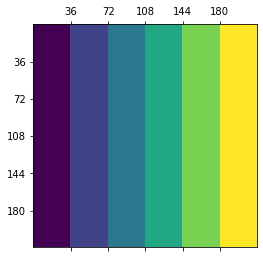

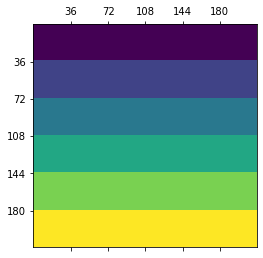

In [61]:
#functions aren't implemented with these return types
b = bacteria()

height = 216
width = 216
table = board(height, width)

allbac = []
allbac.append(b)
for ba in range(len(allbac)):
    table.add_bacteria(allbac[ba].x, allbac[ba].y, allbac[ba])
for d in range(50):
    for ba in range(np.size(allbac)):
        newbac = allbac[ba].reproduce(table)
        if newbac:
            allbac.append(newbac)

beginning


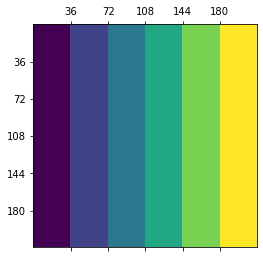

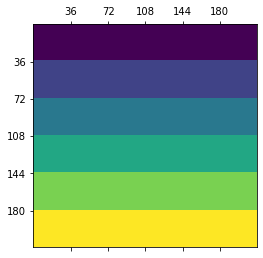

bacteria locations:


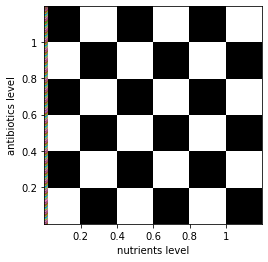

iteration number 1


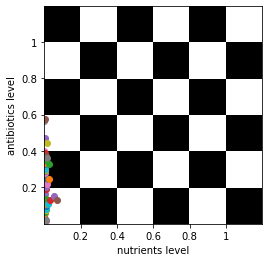

iteration number 2


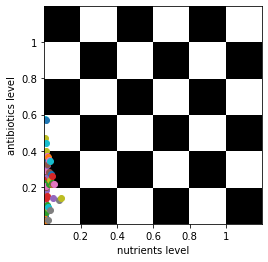

iteration number 3


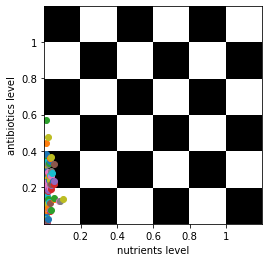

iteration number 4


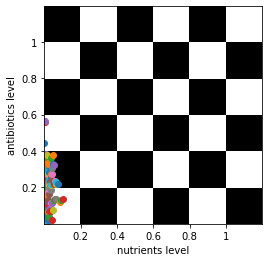

iteration number 5


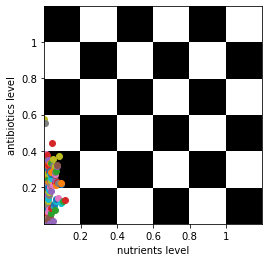

iteration number 6


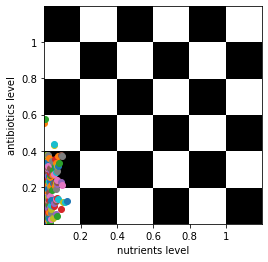

iteration number 7


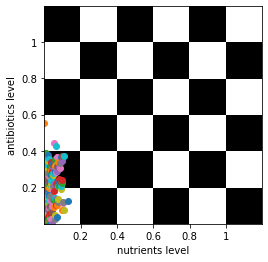

iteration number 8


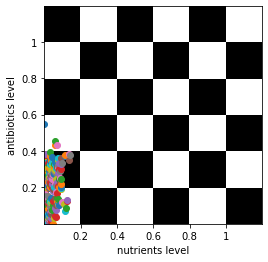

iteration number 9


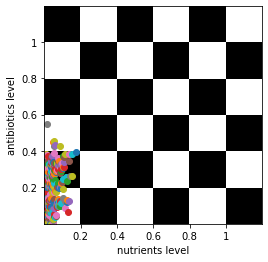

iteration number 10


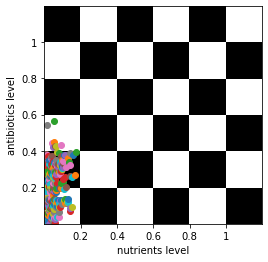

iteration number 11


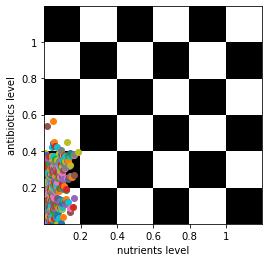

iteration number 12


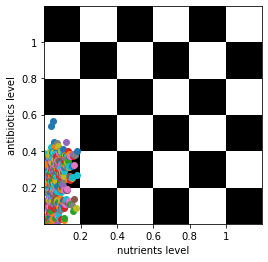

iteration number 13


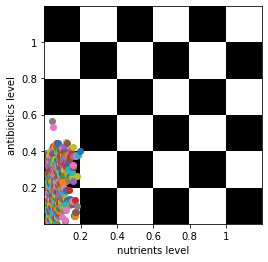

iteration number 14


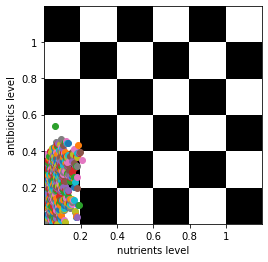

iteration number 15


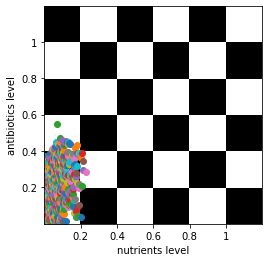

iteration number 16


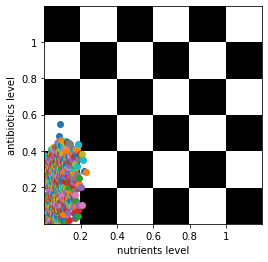

iteration number 17


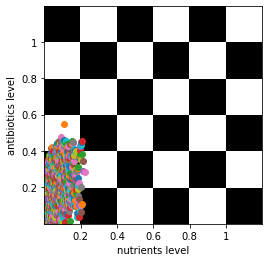

iteration number 18


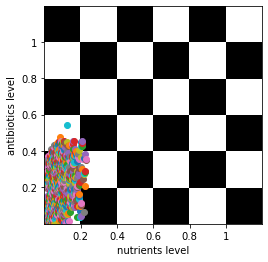

iteration number 19


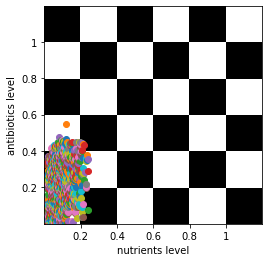

iteration number 20


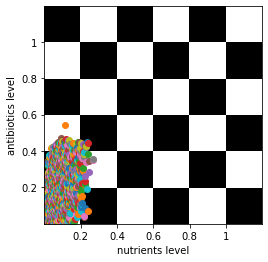

In [62]:

height = 216
width = 216
iterations = 20
print("beginning")
table = board(height, width)
print("bacteria locations:")
table.display()

for i in range(iterations):
    print("iteration number",i+1)
    table.update()
    table.display()

iteration number 20


<Figure size 432x288 with 0 Axes>

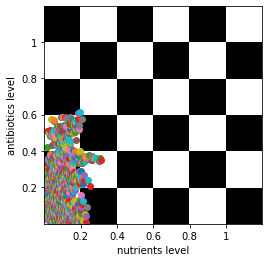

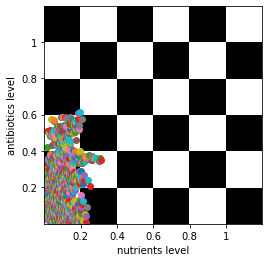

In [63]:
height = 216
width = 216
iterations = 20
print("beginning")
table = board(height, width)
print("bacteria locations:")

table.display()
for i in range(iterations):
    plt.clf()
    clear_output(wait = True)              
    print("iteration number",i+1)
    table.update()
    table.display() # above code with 'animation'
    time.sleep(1)
    
table.display()
    